In [1]:
!pip install mysql-connector-python

In [2]:
import pandas as pd
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting between SQL server and Jupyter
connection = mysql.connector.connect(user='root', password='21avengers', database='utilities_data', host='localhost')

connection

C:\Users\Krish Kabi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
# SQL query to retrieve data
query = "SELECT * FROM utilities_data.Utilities ORDER BY Year, MONTH(FIELD(Month, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))"
data = pd.read_sql_query(query, connection)

<ipython-input-3-e3486adb7faf>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


## Exploratory Data Analysis

In [4]:
data.head()

,Year,Month,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill
0,2022,Jul,1028.0,23.1,294.214,63.1785,357.392
1,2022,Aug,1291.0,30.9,369.484,84.5115,453.996
2,2022,Sep,979.0,29.9,280.190,81.7765,361.966
3,2022,Oct,1063.0,35.1,304.231,95.9985,400.229
4,2022,Nov,1130.0,36.9,323.406,100.9220,424.328


In [5]:
data.isnull().sum()

Year                0
Month               0
ElectricityUsage    0
WaterUsage          0
ElectricityBill     0
WaterBill           0
TotalBill           0
dtype: int64

In [6]:
data.dtypes

Year                  int64
Month                object
ElectricityUsage    float64
WaterUsage          float64
ElectricityBill     float64
WaterBill           float64
TotalBill           float64
dtype: object

In [7]:
# Convert 'Month' to a numerical representation (e.g., 01 for Jan, 02 for Feb, etc.)
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
data['Month'] = data['Month'].map(month_mapping)

# Combine 'Year', 'Month', and set the day to the last day of each month
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data['Date'] = data['Date'] + pd.offsets.MonthEnd(0)

# Set the new date column as the index
data.set_index('Date', inplace=True)

# Drop the individual 'Year' and 'Month' columns
data.drop(['Year', 'Month'], axis=1, inplace=True)

data

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill
Date,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392
2022-08-31,1291.0,30.9,369.484,84.5115,453.996
2022-09-30,979.0,29.9,280.190,81.7765,361.966
2022-10-31,1063.0,35.1,304.231,95.9985,400.229
2022-11-30,1130.0,36.9,323.406,100.9220,424.328
2022-12-31,1050.0,34.8,300.510,95.1780,395.688
2023-01-31,836.0,41.0,239.263,112.1350,351.398
2023-02-28,829.0,-3.4,237.260,-9.2990,227.961
2023-03-31,801.0,17.3,229.246,47.3155,276.562


In [8]:
# Notice that for Feb 2023, the WaterUsage value is negative. This is not possible and therefore an outlier which should be removed

data = data[data['WaterUsage'] >= 0]
data

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill
Date,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392
2022-08-31,1291.0,30.9,369.484,84.5115,453.996
2022-09-30,979.0,29.9,280.190,81.7765,361.966
2022-10-31,1063.0,35.1,304.231,95.9985,400.229
2022-11-30,1130.0,36.9,323.406,100.9220,424.328
2022-12-31,1050.0,34.8,300.510,95.1780,395.688
2023-01-31,836.0,41.0,239.263,112.1350,351.398
2023-03-31,801.0,17.3,229.246,47.3155,276.562
2023-04-30,709.0,9.7,202.916,26.5295,229.445


### Line Chart for Electricity and Water Usage

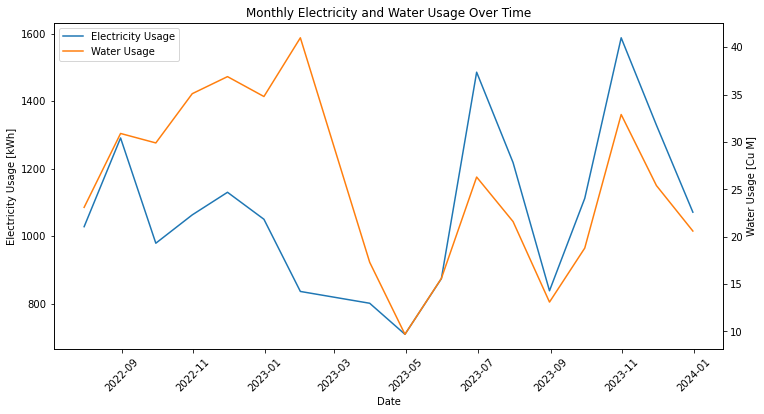

In [9]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.xticks(rotation = 45)

# Plot electricity usage on the primary y-axis (left)
sns.lineplot(x=data.index, y=data['ElectricityUsage'], label='Electricity Usage', ax=ax1, color='tab:blue', legend=False)
ax1.set_ylabel('Electricity Usage [kWh]')

# Create a second y-axis (right)
ax2 = ax1.twinx()
ax2.set_ylabel('Water Usage [Cu M]')

# Plot water usage on the secondary y-axis (right)
sns.lineplot(x=data.index, y=data['WaterUsage'], label='Water Usage', ax=ax2, color='tab:orange', legend=False)

# Legend
fig.legend(loc='upper left', bbox_to_anchor=(0.125, 0.88))

# Title and show the plot
plt.title('Monthly Electricity and Water Usage Over Time')
plt.show()

### Bar Chart for Electricity and Water Usage

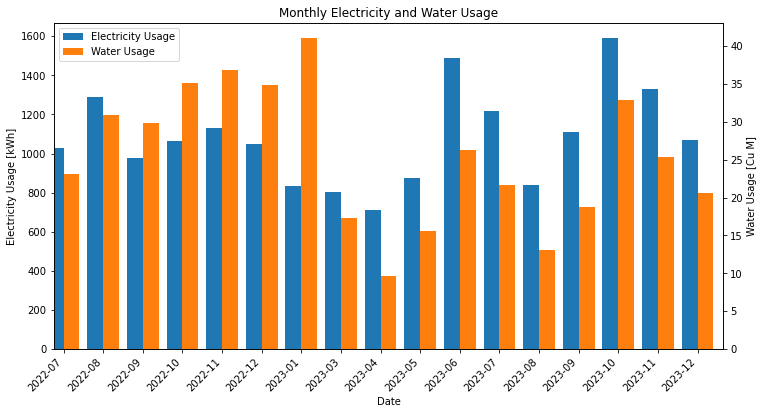

In [10]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot electricity usage on the primary y-axis (left)
data['ElectricityUsage'].plot(kind='bar', ax=ax1, position=1, color='tab:blue', width=0.4, label='Electricity Usage')
ax1.set_ylabel('Electricity Usage [kWh]')

# Create a second y-axis (right)
ax2 = ax1.twinx()
ax2.set_ylabel('Water Usage [Cu M]')

# Plot water usage on the secondary y-axis (right)
data['WaterUsage'].plot(kind='bar', ax=ax2, position=0, color='tab:orange', width=0.4, label='Water Usage')

# Set x-axis labels to Year-Month format
ax1.set_xticklabels(data.index.strftime('%Y-%m'), rotation=45, ha='right')

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.125, 0.88))

# Title and show the plot
plt.title('Monthly Electricity and Water Usage')
plt.xlabel('Month')
plt.show()

In [11]:
# Load climate data
climate_data = pd.read_excel("C:/Users/Krish Kabi/Documents/Data Analysis Projects/Home Energy Savings/ClimateData 2022-23.xlsx")

# Load additional climate data (Humidity, Pressure)
climate_data_2 = pd.read_excel("C:/Users/Krish Kabi/Documents/Data Analysis Projects/Home Energy Savings/ClimateData_2 2022-23.xlsx")

# Load average household electricity consumption data
electricity_data = pd.read_excel("C:/Users/Krish Kabi/Documents/Data Analysis Projects/Home Energy Savings/Electricity Consumption 2022-23.xlsx")

# Load average household water consumption data
water_data = pd.read_excel("C:/Users/Krish Kabi/Documents/Data Analysis Projects/Home Energy Savings/Water Consumption 2023.xlsx")

# Load household occupant data
occupant_data = pd.read_excel("C:/Users/Krish Kabi/Documents/Data Analysis Projects/Home Energy Savings/Additional Data.xlsx")

In [12]:
climate_data.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Clementi,2022,7,1,0,0,0,0,28.7,31.8,26.9,8.4,28.5
1,Clementi,2022,7,2,0,0,0,0,28.9,32,26.6,6.8,25.6
2,Clementi,2022,7,3,0,0,0,0,28.9,32,26.8,5.6,24.4
3,Clementi,2022,7,4,0,0,0,0,29.4,33.8,26.7,4.3,20.6
4,Clementi,2022,7,5,0.4,0.2,0.4,0.4,27.5,30.9,25.3,4.7,27.4


In [13]:
climate_data_2.head()

,Date,Humidity (%),Pressure (mbar)
0,2022-07-01,75,1008
1,2022-08-01,76,1009
2,2022-09-01,75,1010
3,2022-10-01,77,1010
4,2022-11-01,78,1009


In [14]:
electricity_data.head()

,Date,Electricity Consumption (kWh)
0,2022-07-01,817
1,2022-08-01,833
2,2022-09-01,815
3,2022-10-01,781
4,2022-11-01,785


In [15]:
water_data.head()

,Date,Water Consumption (Cu M)
0,2022-07-01,25.8
1,2022-08-01,25.8
2,2022-09-01,25.8
3,2022-10-01,25.8
4,2022-11-01,25.8


In [16]:
occupant_data.head()

,Date,Avg # Occupants
0,2022-07-01,4.00
1,2022-08-01,4.00
2,2022-09-01,4.00
3,2022-10-01,4.00
4,2022-11-01,4.25


In [17]:
# Creating 'Date' column for climate datasets
climate_data['Date'] = pd.to_datetime(climate_data[['Year', 'Month', 'Day']])
climate_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

climate_data_2['Date'] = pd.to_datetime(climate_data_2['Date'])
climate_data_2['Date'] = climate_data_2['Date'] + pd.offsets.MonthEnd(0)

# Set the new date column as the index
climate_data.set_index('Date', inplace=True)
climate_data_2.set_index('Date', inplace=True)

# Creating 'Date' column for average household electricity and water consumption data
electricity_data['Date'] = pd.to_datetime(electricity_data['Date'])
electricity_data['Date'] = electricity_data['Date'] + pd.offsets.MonthEnd(0)

water_data['Date'] = pd.to_datetime(water_data['Date'])
water_data['Date'] = water_data['Date'] + pd.offsets.MonthEnd(0)

# Set the new date column as the index
electricity_data.set_index('Date', inplace=True)
water_data.set_index('Date', inplace=True)

# Creating 'Date' column for occupant data
occupant_data['Date'] = pd.to_datetime(occupant_data['Date'])
occupant_data['Date'] = occupant_data['Date'] + pd.offsets.MonthEnd(0)
occupant_data.set_index('Date', inplace=True)

In [18]:
climate_data.dtypes

Station                          object
Daily Rainfall Total (mm)        object
Highest 30 min Rainfall (mm)     object
Highest 60 min Rainfall (mm)     object
Highest 120 min Rainfall (mm)    object
Mean Temperature (°C)            object
Maximum Temperature (°C)         object
Minimum Temperature (°C)         object
Mean Wind Speed (km/h)           object
Max Wind Speed (km/h)            object
dtype: object

In [19]:
climate_data_2.dtypes

Humidity (%)       int64
Pressure (mbar)    int64
dtype: object

In [20]:
columns_to_convert = [
    'Daily Rainfall Total (mm)',
    'Highest 30 min Rainfall (mm)',
    'Highest 60 min Rainfall (mm)',
    'Highest 120 min Rainfall (mm)',
    'Mean Temperature (°C)',
    'Maximum Temperature (°C)',
    'Minimum Temperature (°C)',
    'Mean Wind Speed (km/h)',
    'Max Wind Speed (km/h)'
]

# Convert columns to float
climate_data[columns_to_convert] = climate_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(climate_data.dtypes)

Station                           object
Daily Rainfall Total (mm)        float64
Highest 30 min Rainfall (mm)     float64
Highest 60 min Rainfall (mm)     float64
Highest 120 min Rainfall (mm)    float64
Mean Temperature (°C)            float64
Maximum Temperature (°C)         float64
Minimum Temperature (°C)         float64
Mean Wind Speed (km/h)           float64
Max Wind Speed (km/h)            float64
dtype: object


In [21]:
# Aggregating climate data by month
climate_monthly = climate_data.groupby(pd.Grouper(freq='M')).agg({
    'Daily Rainfall Total (mm)': 'mean',
    'Highest 30 min Rainfall (mm)': 'max',
    'Highest 60 min Rainfall (mm)': 'max',
    'Highest 120 min Rainfall (mm)': 'max',
    'Mean Temperature (°C)': 'mean',
    'Maximum Temperature (°C)': 'max',
    'Minimum Temperature (°C)': 'min',
    'Mean Wind Speed (km/h)': 'mean',
    'Max Wind Speed (km/h)': 'max'
})

climate_monthly.head()

,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Date,,,,,,,,,
2022-07-31,3.516129,29.2,41.4,42.2,28.306452,33.8,22.4,5.700000,42.4
2022-08-31,11.093333,46.4,57.8,76.0,27.620000,33.2,21.9,5.083333,43.5
2022-09-30,11.013333,43.4,62.8,85.6,27.533333,32.9,22.0,4.760000,42.8
2022-10-31,14.716129,32.4,50.8,71.4,27.241935,34.0,22.2,4.409677,45.4
2022-11-30,11.013333,31.4,39.4,39.4,27.026667,33.8,22.0,4.403333,38.9


In [22]:
# electricity_data.dtypes
# water_data.dtypes

# Merging my utilities data with all other datasets
merged_data = pd.merge(data, climate_monthly, how='inner', left_index=True, right_index=True)
merged_data = pd.merge(merged_data, climate_data_2, how='inner', left_index=True, right_index=True)
merged_data = pd.merge(merged_data, electricity_data, how='inner', left_index=True, right_index=True)
merged_data = pd.merge(merged_data, water_data, how='inner', left_index=True, right_index=True)
merged_data = pd.merge(merged_data, occupant_data, how='inner', left_index=True, right_index=True)

# Display the merged data
merged_data

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Humidity (%),Pressure (mbar),Electricity Consumption (kWh),Water Consumption (Cu M),Avg # Occupants
Date,,,,,,,,,,,,,,,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392,3.516129,29.2,41.4,42.2,28.306452,33.8,22.4,5.700000,42.4,75,1008,817,25.8,4.00
2022-08-31,1291.0,30.9,369.484,84.5115,453.996,11.093333,46.4,57.8,76.0,27.620000,33.2,21.9,5.083333,43.5,76,1009,833,25.8,4.00
2022-09-30,979.0,29.9,280.190,81.7765,361.966,11.013333,43.4,62.8,85.6,27.533333,32.9,22.0,4.760000,42.8,75,1010,815,25.8,4.00
2022-10-31,1063.0,35.1,304.231,95.9985,400.229,14.716129,32.4,50.8,71.4,27.241935,34.0,22.2,4.409677,45.4,77,1010,781,25.8,4.00
2022-11-30,1130.0,36.9,323.406,100.9220,424.328,11.013333,31.4,39.4,39.4,27.026667,33.8,22.0,4.403333,38.9,78,1009,785,25.8,4.25
2022-12-31,1050.0,34.8,300.510,95.1780,395.688,7.458065,26.8,42.2,54.8,26.261290,34.0,22.5,4.787097,40.0,80,1009,752,25.8,2.50
2023-01-31,836.0,41.0,239.263,112.1350,351.398,7.812903,26.4,42.0,69.4,26.351613,33.3,22.4,5.351613,42.8,81,1010,748,25.3,4.50
2023-03-31,801.0,17.3,229.246,47.3155,276.562,11.070968,30.0,32.8,41.2,26.409677,34.8,21.3,5.993548,40.0,78,1011,686,25.1,2.75
2023-04-30,709.0,9.7,202.916,26.5295,229.445,7.666667,34.0,40.4,40.8,28.216667,35.2,22.9,3.823333,44.6,77,1009,756,25.4,4.00


### Comparison with Average Electricity and Water Consumption

#### Electricty Usage vs Average Monthly Electricity Consumption Chart

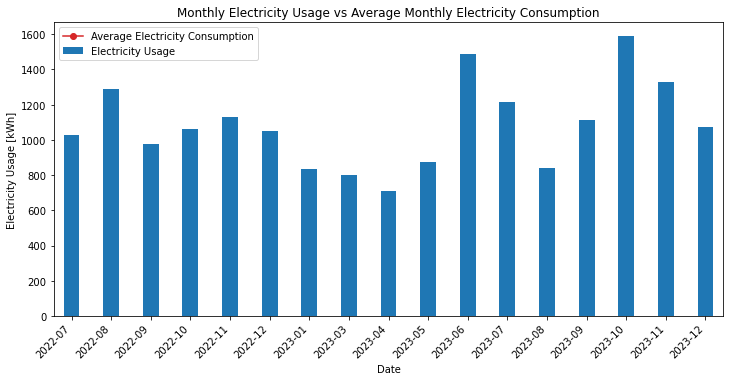

In [23]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot your household's electricity usage as bars
merged_data['ElectricityUsage'].plot(kind='bar', ax=ax1, label='Electricity Usage', color='tab:blue', width=0.4)
ax1.set_ylabel('Electricity Usage [kWh]')

# Plot average electricity consumption as a line chart on the same axes
merged_data['Electricity Consumption (kWh)'].plot(kind='line', ax=ax1, linestyle='-', marker='o', label='Average Electricity Consumption', color='tab:red')

# Set x-axis labels to Year-Month format
ax1.set_xticklabels(merged_data.index.strftime('%Y-%m'), rotation=45, ha='right')

# Legend
plt.legend()

# Title and show the plot
plt.title('Monthly Electricity Usage vs Average Monthly Electricity Consumption')
plt.xlabel('Date')
plt.show()

#### Water Usage vs Average Monthly Water Consumption Chart

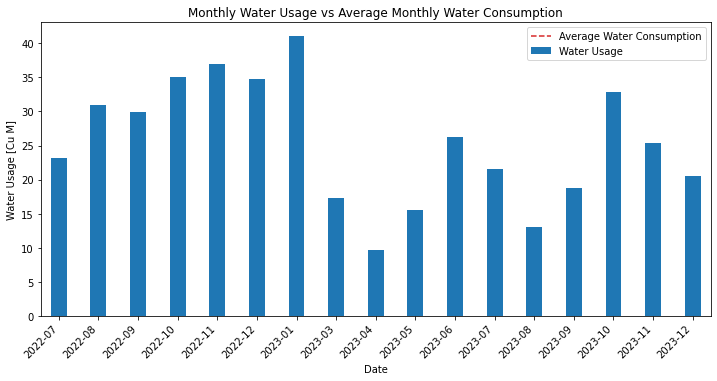

In [24]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot your household's electricity usage as bars
merged_data['WaterUsage'].plot(kind='bar', ax=ax1, label='Water Usage', color='tab:blue', width=0.4)
ax1.set_ylabel('Water Usage [Cu M]')

# Plot average electricity consumption as a line chart on the same axes
merged_data['Water Consumption (Cu M)'].plot(kind='line', ax=ax1, linestyle='dashed', label='Average Water Consumption', color='tab:red')

# Set x-axis labels to Year-Month format
ax1.set_xticklabels(merged_data.index.strftime('%Y-%m'), rotation=45, ha='right')

# Legend
plt.legend()

# Title and show the plot
plt.title('Monthly Water Usage vs Average Monthly Water Consumption')
plt.xlabel('Date')
plt.show()

### Correlation Heatmap

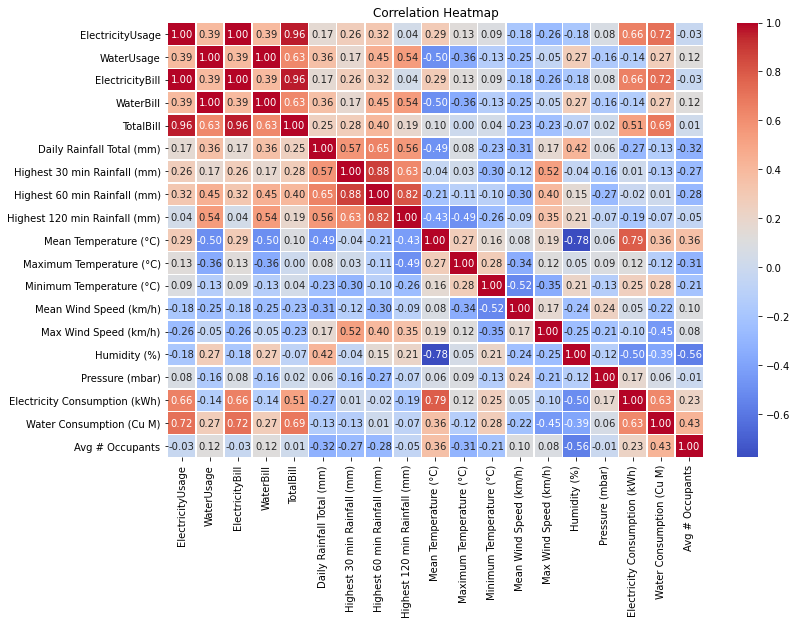

In [25]:
# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Calculate correlation for electricity usage
electricity_corr = merged_data.corr()['ElectricityUsage']

# Print correlation values
print("Correlation with Electricity Usage:")
print(electricity_corr)

Correlation with Electricity Usage:
ElectricityUsage                 1.000000
WaterUsage                       0.389994
ElectricityBill                  1.000000
WaterBill                        0.389994
TotalBill                        0.960885
Daily Rainfall Total (mm)        0.165292
Highest 30 min Rainfall (mm)     0.264948
Highest 60 min Rainfall (mm)     0.317010
Highest 120 min Rainfall (mm)    0.035169
Mean Temperature (°C)            0.291573
Maximum Temperature (°C)         0.129580
Minimum Temperature (°C)         0.092043
Mean Wind Speed (km/h)          -0.181141
Max Wind Speed (km/h)           -0.258359
Humidity (%)                    -0.181194
Pressure (mbar)                  0.075966
Electricity Consumption (kWh)    0.657547
Water Consumption (Cu M)         0.721405
Avg # Occupants                 -0.025317
Name: ElectricityUsage, dtype: float64


In [27]:
# Calculate correlation for electricity usage
water_corr = merged_data.corr()['WaterUsage']

# Print correlation values
print("Correlation with Water Usage:")
print(water_corr)

Correlation with Water Usage:
ElectricityUsage                 0.389994
WaterUsage                       1.000000
ElectricityBill                  0.389994
WaterBill                        1.000000
TotalBill                        0.629758
Daily Rainfall Total (mm)        0.359777
Highest 30 min Rainfall (mm)     0.174113
Highest 60 min Rainfall (mm)     0.450311
Highest 120 min Rainfall (mm)    0.544932
Mean Temperature (°C)           -0.496056
Maximum Temperature (°C)        -0.355589
Minimum Temperature (°C)        -0.126263
Mean Wind Speed (km/h)          -0.252352
Max Wind Speed (km/h)           -0.054116
Humidity (%)                     0.271425
Pressure (mbar)                 -0.160343
Electricity Consumption (kWh)   -0.135356
Water Consumption (Cu M)         0.274556
Avg # Occupants                  0.119384
Name: WaterUsage, dtype: float64


### Correlation Analysis

The correlation analysis provides valuable insights into the relationships between variables, helping guide feature selection for predicting Electricity Usage and Water Usage.

#### Electricity Usage:

- Strong positive Correlations: the strong positive correlations between Electricity Usage and Electricity Consumption (0.66) as well as Water Consumption (0.72) indicate that these features significantly influence monthly electricity usage.

- Moderate Positive Correlations: WaterUsage exhibits a positive correlation (0.39). The positive correlation with Mean Temperature (0.29) implies a connection between higher temperatures and increased electricity usage.

- Moderate Negative Correlations: Daily Rainfall Total, Highest 30 min Rainfall, Highest 60 min Rainfall, and Highest 120 min Rainfall have weak to moderate negative correlations (around -0.18 to -0.26). These correlations suggest that higher rainfall is associated with slightly lower electricity usage.

#### Water Usage:

- Moderate Positive Correlations: The positive correlation with Highest 60 min Rainfall (0.45) and Highest 120 min Rainfall (0.54) suggests a connection between intense rainfall events and increased water usage.

- Moderate Negative Correlations: Mean Temperature and Maximum Temperature show negative correlations (around -0.35 and -0.50, respectively), implying that higher temperatures are associated with lower water usage.

- Weak Correlations: Mean Wind Speed and Max Wind Speed have weak negative correlations with both electricity and water usage. The weak correlation with Minimum Temperature (0.09) indicates a minor influence on electricity usage.

#### Next Steps:

The identified correlations guide the selection of relevant features for modeling. Variables with strong correlations (positive or negative) are prioritized for inclusion in predictive models. The inclusion of Electricity Consumption and Water Consumption as predictive features in the model leverages broader regional trends, enhancing the accuracy of predictions by capturing consistent patterns and behaviors. Daily rainfall metrics provide additional insights into the relationship between weather patterns and utility usage. Temperature-related variables, especially Mean and Maximum Temperature, show moderate correlations, highlighting their importance in predicting usage patterns.

Proceeding with these selected features will contribute to building a predictive model that captures the key factors influencing Electricity Usage and Water Usage, helping to optimize resource management and reduce utility costs.

## Feature Engineering

### Date Features

In [28]:
# Extract month and quarter from the date
merged_data['Month'] = merged_data.index.month
merged_data['Quarter'] = merged_data.index.quarter

# Display the updated DataFrame
merged_data

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),...,Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Humidity (%),Pressure (mbar),Electricity Consumption (kWh),Water Consumption (Cu M),Avg # Occupants,Month,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392,3.516129,29.2,41.4,42.2,28.306452,...,22.4,5.700000,42.4,75,1008,817,25.8,4.00,7,3
2022-08-31,1291.0,30.9,369.484,84.5115,453.996,11.093333,46.4,57.8,76.0,27.620000,...,21.9,5.083333,43.5,76,1009,833,25.8,4.00,8,3
2022-09-30,979.0,29.9,280.190,81.7765,361.966,11.013333,43.4,62.8,85.6,27.533333,...,22.0,4.760000,42.8,75,1010,815,25.8,4.00,9,3
2022-10-31,1063.0,35.1,304.231,95.9985,400.229,14.716129,32.4,50.8,71.4,27.241935,...,22.2,4.409677,45.4,77,1010,781,25.8,4.00,10,4
2022-11-30,1130.0,36.9,323.406,100.9220,424.328,11.013333,31.4,39.4,39.4,27.026667,...,22.0,4.403333,38.9,78,1009,785,25.8,4.25,11,4
2022-12-31,1050.0,34.8,300.510,95.1780,395.688,7.458065,26.8,42.2,54.8,26.261290,...,22.5,4.787097,40.0,80,1009,752,25.8,2.50,12,4
2023-01-31,836.0,41.0,239.263,112.1350,351.398,7.812903,26.4,42.0,69.4,26.351613,...,22.4,5.351613,42.8,81,1010,748,25.3,4.50,1,1
2023-03-31,801.0,17.3,229.246,47.3155,276.562,11.070968,30.0,32.8,41.2,26.409677,...,21.3,5.993548,40.0,78,1011,686,25.1,2.75,3,1
2023-04-30,709.0,9.7,202.916,26.5295,229.445,7.666667,34.0,40.4,40.8,28.216667,...,22.9,3.823333,44.6,77,1009,756,25.4,4.00,4,2


In [29]:
# Perform one-hot encoding for 'Month' and 'Quarter'
merged_data = pd.get_dummies(merged_data, columns=['Month', 'Quarter'], prefix=['Month', 'Quarter'], drop_first=True)

# Display the updated DataFrame
merged_data.head()

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_2,Quarter_3,Quarter_4
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392,3.516129,29.2,41.4,42.2,28.306452,...,False,True,False,False,False,False,False,False,True,False
2022-08-31,1291.0,30.9,369.484,84.5115,453.996,11.093333,46.4,57.8,76.0,27.620000,...,False,False,True,False,False,False,False,False,True,False
2022-09-30,979.0,29.9,280.190,81.7765,361.966,11.013333,43.4,62.8,85.6,27.533333,...,False,False,False,True,False,False,False,False,True,False
2022-10-31,1063.0,35.1,304.231,95.9985,400.229,14.716129,32.4,50.8,71.4,27.241935,...,False,False,False,False,True,False,False,False,False,True
2022-11-30,1130.0,36.9,323.406,100.9220,424.328,11.013333,31.4,39.4,39.4,27.026667,...,False,False,False,False,False,True,False,False,False,True


### Weather Interaction Features

We'll combine the weather features to capture potential interaction effects. For simplicity, we can create interaction terms by multiplying pairs of features.

In [30]:
# Interaction features for Electricity Usage
merged_data['Temp_Rainfall'] = merged_data['Mean Temperature (°C)'] * merged_data['Daily Rainfall Total (mm)']
merged_data['Temp_H30min'] = merged_data['Mean Temperature (°C)'] * merged_data['Highest 30 min Rainfall (mm)']
merged_data['Temp_H60min'] = merged_data['Mean Temperature (°C)'] * merged_data['Highest 60 min Rainfall (mm)']

# Interaction features for Water Usage
# merged_data['Temp_H60min'] = merged_data['Mean Temperature (°C)'] * merged_data['Highest 60 min Rainfall (mm)']
merged_data['Temp_H120min'] = merged_data['Mean Temperature (°C)'] * merged_data['Highest 120 min Rainfall (mm)']

# Display the updated DataFrame
merged_data.head()

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),...,Month_10,Month_11,Month_12,Quarter_2,Quarter_3,Quarter_4,Temp_Rainfall,Temp_H30min,Temp_H60min,Temp_H120min
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392,3.516129,29.2,41.4,42.2,28.306452,...,False,False,False,False,True,False,99.529136,826.548387,1171.887097,1194.532258
2022-08-31,1291.0,30.9,369.484,84.5115,453.996,11.093333,46.4,57.8,76.0,27.620000,...,False,False,False,False,True,False,306.397867,1281.568000,1596.436000,2099.120000
2022-09-30,979.0,29.9,280.190,81.7765,361.966,11.013333,43.4,62.8,85.6,27.533333,...,False,False,False,False,True,False,303.233778,1194.946667,1729.093333,2356.853333
2022-10-31,1063.0,35.1,304.231,95.9985,400.229,14.716129,32.4,50.8,71.4,27.241935,...,True,False,False,False,False,True,400.895838,882.638710,1383.890323,1945.074194
2022-11-30,1130.0,36.9,323.406,100.9220,424.328,11.013333,31.4,39.4,39.4,27.026667,...,False,True,False,False,False,True,297.653689,848.637333,1064.850667,1064.850667


### Regional Trend Feature

Creating a feature that captures the regional trends represented by Electricity Consumption and Water Consumption can help the model learn from broader usage patterns, providing valuable information for predicting Electricity Usage.

In [31]:
# Create a feature capturing regional trends
merged_data['RegionalTrend'] = merged_data['Electricity Consumption (kWh)'] + merged_data['Water Consumption (Cu M)']

# Display the updated DataFrame
merged_data.head()

,ElectricityUsage,WaterUsage,ElectricityBill,WaterBill,TotalBill,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),...,Month_11,Month_12,Quarter_2,Quarter_3,Quarter_4,Temp_Rainfall,Temp_H30min,Temp_H60min,Temp_H120min,RegionalTrend
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-31,1028.0,23.1,294.214,63.1785,357.392,3.516129,29.2,41.4,42.2,28.306452,...,False,False,False,True,False,99.529136,826.548387,1171.887097,1194.532258,842.8
2022-08-31,1291.0,30.9,369.484,84.5115,453.996,11.093333,46.4,57.8,76.0,27.620000,...,False,False,False,True,False,306.397867,1281.568000,1596.436000,2099.120000,858.8
2022-09-30,979.0,29.9,280.190,81.7765,361.966,11.013333,43.4,62.8,85.6,27.533333,...,False,False,False,True,False,303.233778,1194.946667,1729.093333,2356.853333,840.8
2022-10-31,1063.0,35.1,304.231,95.9985,400.229,14.716129,32.4,50.8,71.4,27.241935,...,False,False,False,False,True,400.895838,882.638710,1383.890323,1945.074194,806.8
2022-11-30,1130.0,36.9,323.406,100.9220,424.328,11.013333,31.4,39.4,39.4,27.026667,...,True,False,False,False,True,297.653689,848.637333,1064.850667,1064.850667,810.8


In [32]:
merged_data.columns

Index(['ElectricityUsage', 'WaterUsage', 'ElectricityBill', 'WaterBill',
       'TotalBill', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Humidity (%)',
       'Pressure (mbar)', 'Electricity Consumption (kWh)',
       'Water Consumption (Cu M)', 'Avg # Occupants', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Temp_Rainfall', 'Temp_H30min', 'Temp_H60min', 'Temp_H120min',
       'RegionalTrend'],
      dtype='object')

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

# Features for the model
features = ['Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 
            'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
            'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Humidity (%)', 'Pressure (mbar)', 
            'Electricity Consumption (kWh)', 'Water Consumption (Cu M)', 'Avg # Occupants', 'Month_3', 'Month_4', 'Month_5',
            'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Quarter_2', 'Quarter_3', 
            'Quarter_4', 'Temp_Rainfall', 'Temp_H30min', 'Temp_H60min', 'Temp_H120min', 'RegionalTrend']

# Target variables
targets = ['ElectricityUsage', 'WaterUsage']

# Extract features and targets
X = merged_data[features]
y = merged_data[targets]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (13, 32)  y: (13, 2)
Testing set shape - X: (4, 32)  y: (4, 2)


## Machine Learning Algorithms

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 48063.019910317635
Mean Absolute Error: 141.30745160596442
R-squared: -3.866268198001344


The results show a high MSE and MAE, and a negative R-squared, which suggests that the model is not performing well. Negative R-squared typically indicates that the chosen model doesn't fit the data well.

#### Recursive Feature Elimination

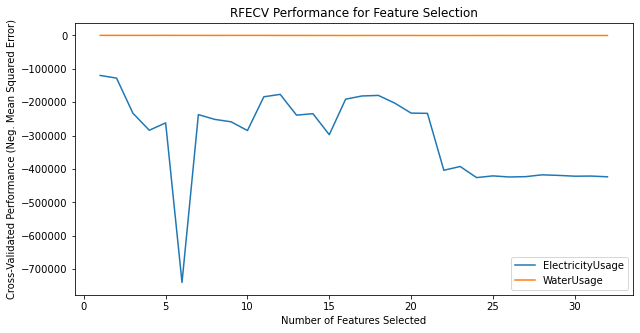

Selected Features for ElectricityUsage: Index(['Month_6'], dtype='object')
Selected Features for WaterUsage: Index(['Mean Temperature (°C)', 'Pressure (mbar)', 'Month_4', 'Month_6',
       'Quarter_4'],
      dtype='object')


In [36]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit

# Creating a linear regression model
model = LinearRegression()

# Creating a time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Feature selection for ElectricityUsage
rfe_electricity = RFECV(estimator=model, step=1, cv=tscv, scoring='neg_mean_squared_error')
rfe_electricity.fit(X_train, y_train['ElectricityUsage'])

# Feature selection for WaterUsage
rfe_water = RFECV(estimator=model, step=1, cv=tscv, scoring='neg_mean_squared_error')
rfe_water.fit(X_train, y_train['WaterUsage'])

# Visualize the number of features vs. cross-validated performance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(rfe_electricity.grid_scores_) + 1), rfe_electricity.grid_scores_, label='ElectricityUsage')
plt.plot(range(1, len(rfe_water.grid_scores_) + 1), rfe_water.grid_scores_, label='WaterUsage')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Performance (Neg. Mean Squared Error)')
plt.title('RFECV Performance for Feature Selection')
plt.legend()
plt.show()

# Selected features for ElectricityUsage and WaterUsage
selected_features_electricity = X_train.columns[rfe_electricity.support_]
selected_features_water = X_train.columns[rfe_water.support_]

# Display selected features
print("Selected Features for ElectricityUsage:", selected_features_electricity)
print("Selected Features for WaterUsage:", selected_features_water)

In [37]:
# Selected features for ElectricityUsage
selected_features_electricity = ['Month_6']
X_train_electricity = X_train[selected_features_electricity]
X_test_electricity = X_test[selected_features_electricity]

# Selected features for WaterUsage
selected_features_water = ['Mean Temperature (°C)', 'Pressure (mbar)', 'Month_4', 'Month_6', 'Quarter_4']
X_train_water = X_train[selected_features_water]
X_test_water = X_test[selected_features_water]

# Train Linear Regression models
model_electricity = LinearRegression()
model_water = LinearRegression()

# Fit the models
model_electricity.fit(X_train_electricity, y_train['ElectricityUsage'])
model_water.fit(X_train_water, y_train['WaterUsage'])

# Make predictions on the testing set
y_pred_electricity = model_electricity.predict(X_test_electricity)
y_pred_water = model_water.predict(X_test_water)

# Evaluate the models
mse_electricity = mean_squared_error(y_test['ElectricityUsage'], y_pred_electricity)
mae_electricity = mean_absolute_error(y_test['ElectricityUsage'], y_pred_electricity)
r2_electricity = r2_score(y_test['ElectricityUsage'], y_pred_electricity)

mse_water = mean_squared_error(y_test['WaterUsage'], y_pred_water)
mae_water = mean_absolute_error(y_test['WaterUsage'], y_pred_water)
r2_water = r2_score(y_test['WaterUsage'], y_pred_water)

# Display the evaluation metrics
print("ElectricityUsage Model:")
print("Mean Squared Error:", mse_electricity)
print("Mean Absolute Error:", mae_electricity)
print("R-squared:", r2_electricity)
print("\nWaterUsage Model:")
print("Mean Squared Error:", mse_water)
print("Mean Absolute Error:", mae_water)
print("R-squared:", r2_water)

ElectricityUsage Model:
Mean Squared Error: 43015.3125
Mean Absolute Error: 156.25
R-squared: -1.3124958000134401

WaterUsage Model:
Mean Squared Error: 30.323850597747576
Mean Absolute Error: 5.14389947573809
R-squared: -0.44039190584242216


The drastic change in model performance between the initial linear regression model and the subsequent model with reduced features indicates that the feature selection process significantly impacted the model's predictive ability.

For the ElectricityUsage model, the high errors and negative R-squared value suggest that the selected features may not be capturing the underlying patterns well, resulting in poor predictions. The model may lack the necessary complexity to represent the relationships within the data. One possible reason is that linear regression assumes a linear relationship between features and the target variable, and the actual relationships in the data may be more complex.

On the other hand, the improved performance of the WaterUsage model might be attributed to the specific features selected, which could be more indicative of the patterns in water consumption.

Given these results, it might be worthwhile to explore more sophisticated regression models that can capture non-linear relationships such as random forest regression.

### Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Features and targets
X = merged_data[features]
y_electricity = merged_data['ElectricityUsage']
y_water = merged_data['WaterUsage']

# Split the data into training and testing sets
X_train, X_test, y_train_electricity, y_test_electricity, y_train_water, y_test_water = train_test_split(
    X, y_electricity, y_water, test_size=0.2, random_state=42
)

# Random Forest model for ElectricityUsage
rf_electricity = RandomForestRegressor(random_state=42)
rf_electricity.fit(X_train, y_train_electricity)
predictions_electricity = rf_electricity.predict(X_test)

# Random Forest model for WaterUsage
rf_water = RandomForestRegressor(random_state=42)
rf_water.fit(X_train, y_train_water)
predictions_water = rf_water.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, true_values, label):
    mse = mean_squared_error(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    print(f"{label} Model:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n")

# Evaluate Random Forest models
evaluate_model(predictions_electricity, y_test_electricity, "Electricity")
evaluate_model(predictions_water, y_test_water, "Water")

Electricity Model:
Mean Squared Error: 21530.13494999998
Mean Absolute Error: 117.03499999999994
R-squared: -0.15745635105167555


Water Model:
Mean Squared Error: 16.75514274999998
Mean Absolute Error: 3.3587499999999926
R-squared: 0.20412574516090776




The significant reduction in errors for both the ElectricityUsage and WaterUsage models after switching to Random Forest Regression suggests that the underlying relationships in the data are likely non-linear and better captured by a more flexible model. Random Forest, with its ensemble of decision trees, excels in capturing complex patterns and interactions between features. 

To further fine-tune the model, hyperparameter tuning can be performed. This involves adjusting the settings of the Random Forest model, such as the number of trees, tree depth, and minimum samples per leaf. Grid search or random search methods can be employed to find the optimal combination of hyperparameters, leading to improved model performance. Additionally, feature importance analysis within the Random Forest model can help identify the most influential variables, guiding further feature engineering or selection processes.

#### HyperParameter Tuning - Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to perform grid search and return the best model
def grid_search(X_train, y_train, param_grid):
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Perform grid search for ElectricityUsage model
electricity_model = grid_search(X_train, y_train['ElectricityUsage'], param_grid)

# Perform grid search for WaterUsage model
water_model = grid_search(X_train, y_train['WaterUsage'], param_grid)

# Display the best hyperparameters for both models
print("Best hyperparameters for ElectricityUsage model:", electricity_model.get_params())
print("Best hyperparameters for WaterUsage model:", water_model.get_params())

Best hyperparameters for ElectricityUsage model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best hyperparameters for WaterUsage model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [41]:
# Function to train and evaluate the model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, target_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display the evaluation metrics
    print(f"{target_name} Model:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n")

# Retrain the models with the best hyperparameters
electricity_model = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='mse',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=50,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False
)

water_model = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='mse',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    min_samples_leaf=1,
    min_samples_split=10,
    min_weight_fraction_leaf=0.0,
    n_estimators=150,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False
)

# Train and evaluate the models
train_evaluate_model(electricity_model, X_train, y_train['ElectricityUsage'], X_test, y_test['ElectricityUsage'], "Electricity Usage")
train_evaluate_model(water_model, X_train, y_train['WaterUsage'], X_test, y_test['WaterUsage'], "Water Usage")

Electricity Usage Model:
Mean Squared Error: 20463.984500000002
Mean Absolute Error: 119.29500000000002
R-squared: -0.10014028627108407


Water Usage Model:
Mean Squared Error: 33.424033665504794
Mean Absolute Error: 4.536595880508384
R-squared: -0.5876515219334908




The hyperparameter tuning results show a slight increase in Mean Squared Error (MSE) and Mean Absolute Error (MAE) for both the Electricity Usage and Water Usage models when compared to the initial Random Forest Regression model, indicating that the former model performed slightly better. However, the differences are not substantial, and it's important to consider that hyperparameter tuning might not always lead to significant improvements, as it depends on the characteristics of the dataset.

The R-squared values, which measure the proportion of variance explained by the model, are close to zero or very negative. This suggests that the models, even with hyperparameter tuning, struggle to capture the variance in the target variables.

Evaluating the feature importance from the Random Forest models can provide insights into which features are contributing more significantly to the predictions. This information can guide further refinement of features or model selection.

#### Feature Importance Analysis

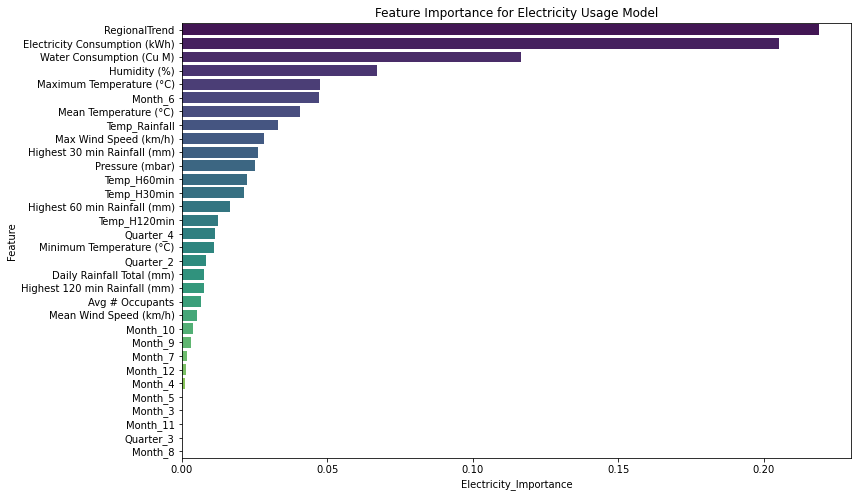

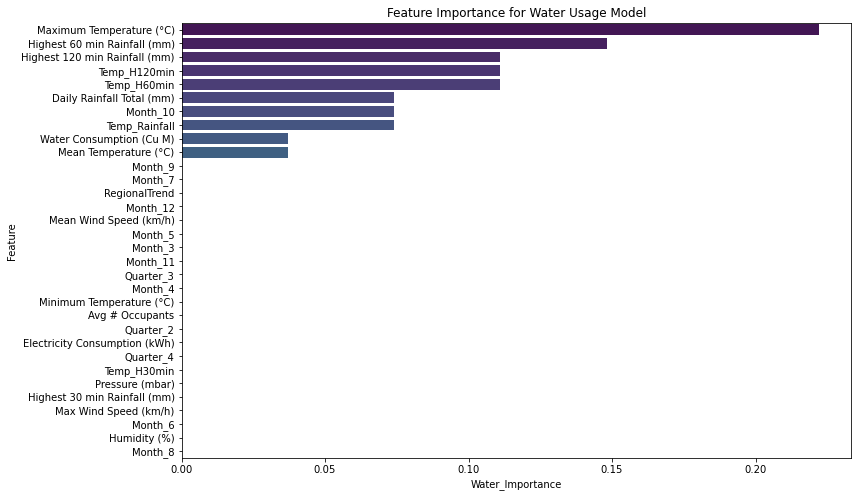

In [42]:
# Extract feature importances from the models
electricity_feature_importance = electricity_model.feature_importances_
water_feature_importance = water_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Electricity_Importance': electricity_feature_importance,
    'Water_Importance': water_feature_importance
})

# Sort features based on importance for better visualization
feature_importance_df.sort_values(by='Electricity_Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Electricity_Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Electricity Usage Model')
plt.show()

# Repeat for Water Usage model
feature_importance_df.sort_values(by='Water_Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='Water_Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Water Usage Model')
plt.show()

In [43]:
# Extract top 5 features for Electricity Usage
top_electricity_features = feature_importance_df.nlargest(5, 'Electricity_Importance')[['Feature', 'Electricity_Importance']]

# Extract top 5 features for Water Usage
top_water_features = feature_importance_df.nlargest(5, 'Water_Importance')[['Feature', 'Water_Importance']]

# Display the top 5 features for Electricity Usage
print("Top 5 Features for Electricity Usage:")
print(top_electricity_features)

# Display the top 5 features for Water Usage
print("\nTop 5 Features for Water Usage:")
print(top_water_features)

Top 5 Features for Electricity Usage:
                          Feature  Electricity_Importance
31                  RegionalTrend                0.219049
11  Electricity Consumption (kWh)                0.205235
12       Water Consumption (Cu M)                0.116513
9                    Humidity (%)                0.067176
5        Maximum Temperature (°C)                0.047478

Top 5 Features for Water Usage:
                          Feature  Water_Importance
5        Maximum Temperature (°C)          0.222222
2    Highest 60 min Rainfall (mm)          0.148148
3   Highest 120 min Rainfall (mm)          0.111111
30                   Temp_H120min          0.111111
29                    Temp_H60min          0.111111


In [47]:
# Extract top 5 features for Electricity Usage
top_electricity_features = [
    'RegionalTrend',
    'Electricity Consumption (kWh)',
    'Water Consumption (Cu M)',
    'Humidity (%)',
    'Maximum Temperature (°C)'
]

# Extract top 5 features for Water Usage
top_water_features = [
    'Mean Temperature (°C)',
    'Highest 60 min Rainfall (mm)',
    'Highest 120 min Rainfall (mm)',
    'Temp_H120min',
    'Temp_H60min'
]

# Retrain the models with the best hyperparameters using top features
electricity_model = RandomForestRegressor(
#     bootstrap=True,
#     ccp_alpha=0.0,
#     criterion='mse',
#     max_depth=None,
#     max_features='auto',
#     max_leaf_nodes=None,
#     max_samples=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     min_weight_fraction_leaf=0.0,
#     n_estimators=50,
#     n_jobs=None,
#     oob_score=False,
    random_state=42,
#     verbose=0,
#     warm_start=False
)

water_model = RandomForestRegressor(
#     bootstrap=True,
#     ccp_alpha=0.0,
#     criterion='mse',
#     max_depth=None,
#     max_features='auto',
#     max_leaf_nodes=None,
#     max_samples=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     min_samples_leaf=4,
#     min_samples_split=2,
#     min_weight_fraction_leaf=0.0,
#     n_estimators=150,
#     n_jobs=None,
#     oob_score=False,
    random_state=42,
#     verbose=0,
#     warm_start=False
)

# Train and evaluate the models
train_evaluate_model(electricity_model, X_train[top_electricity_features], y_train['ElectricityUsage'], X_test[top_electricity_features], y_test['ElectricityUsage'], "Electricity Usage")
train_evaluate_model(water_model, X_train[top_water_features], y_train['WaterUsage'], X_test[top_water_features], y_test['WaterUsage'], "Water Usage")

Electricity Usage Model:
Mean Squared Error: 19509.471825000004
Mean Absolute Error: 107.86249999999998
R-squared: -0.04882584906928322


Water Usage Model:
Mean Squared Error: 10.936139749999972
Mean Absolute Error: 2.861249999999994
R-squared: 0.480530115188221




The comparison between the initial and final RandomForest regression models reveals mixed results for electricity and water usage predictions. 

For electricity usage, the initial model exhibited higher mean squared error, 21530, but after hyperparameter tuning and feature selection, the mean squared error decreased to 19509. The mean absolute error also decreased from 117.03 to 107.86, and the R-squared increased from -0.157 to -0.049. This suggests that the latter model performed slightly better for electricity usage. 

Furthermore, for water usage, the final model showcased significant improvement. The mean squared error decreased from 16.76 to 10.94, the mean absolute error decreased from 3.36 to 2.86, and the R-squared increased from 0.20 to 0.48. These improvements indicate that the final model is more accurate and better captures the variability in water usage.

## Discussion & Conclusion

After analyzing the results, it is determined that a higher precision and more data is needed to formulate a proper trend. It's crucial to consider additional steps to enhance the predictive model:

1. Feature Engineering: Explore more features or derive new ones that could have a significant impact on electricity and water usage patterns. This could include more detailed information about occupants, specific appliance usage, or any other relevant factors.

2. Data Collection: If possible, gather more data to increase the size of the dataset. A larger dataset can provide the model with more examples to learn from and potentially improve its predictive accuracy.

3. Model Selection: Consider trying different machine learning models beyond Random Forest Regression. Neural networks, for example, can capture complex patterns but might require more data and careful tuning.

4. Hyperparameter Tuning: Continue fine-tuning the model's hyperparameters to find the best configuration for improved performance.

5. Cross-Validation: Implement cross-validation techniques to ensure the model's generalization performance and reduce the risk of overfitting.

6. Iterative Approach: Data science projects often benefit from an iterative approach. Regularly revisiting and refining the model based on insights gained during the process can help increase model accuracy.

## Bibliography

https://www.spgroup.com.sg/our-services/utilities/tariff-information

http://www.weather.gov.sg/climate-historical-daily/

https://www.timeanddate.com/weather/singapore/singapore/historic?month=12&year=2023